# Data Processing and Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.style.use('ggplot')

import seaborn as sns

In [13]:
data = [909976, 8615246, 2872086, 2273305]
data1 = ["Stockholm", "London", "Rome", "Paris"]
label = "Population"
s = pd.Series(data)
s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [14]:
list(s.index)

[0, 1, 2, 3]

In [15]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [16]:
s.index = data1
s.name = label
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [18]:
s = pd.Series(data, name=label, index=data1)
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [19]:
s["London"]

8615246

In [20]:
s.Stockholm

909976

In [21]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [22]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [23]:
s.min(), s.max()

(909976, 8615246)

In [24]:
s.quantile(q = 0.25), s.quantile(q=0.5), s.quantile(q = .75)

(1932472.75, 2572695.5, 4307876.0)

In [25]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

<AxesSubplot:title={'center':'pie'}, ylabel='Population'>

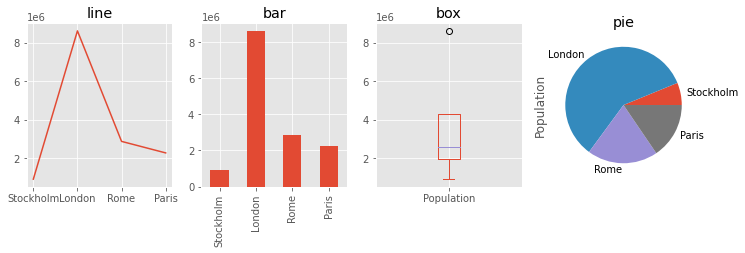

In [26]:
fig, axes = plt.subplots(1,4,figsize=(12,3))
s.plot(ax=axes[0], kind='line', title='line')
s.plot(ax=axes[1], kind='bar', title='bar')
s.plot(ax=axes[2], kind='box', title='box')
s.plot(ax=axes[3], kind='pie', title='pie')

In [30]:
data = [909976, 8615246, 2872086, 2273305]
data1 = ["Stockholm", "London", "Rome", "Paris"]
data2 = ["Sweden", "United Kingdom", "Italy", "France"]
label1, label2 = "Population", "State"

In [31]:
df = pd.DataFrame([[u,v] for u,v in zip(data, data2)])
df

,0,1
0,909976,Sweden
1,8615246,United Kingdom
2,2872086,Italy
3,2273305,France


In [33]:
df.index = data1
df.columns = [label1, label2]
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [34]:
df = pd.DataFrame([[u,v] for u,v in zip(data, data2)], index = data1, columns=[label1,label2])
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [36]:
df = pd.DataFrame({label1: data, label2: data2}, index=data1)
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United Kingdom
Rome,2872086,Italy
Paris,2273305,France


In [37]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [38]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [39]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [40]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [45]:
df["Population"].mean()

3667653.25

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [47]:
!head -n 5 european_cities.csv

Rank,City,State,Population,Date of census/estimate
1,London[2], United Kingdom,"8,615,246",1 June 2014
2,Berlin, Germany,"3,437,916",31 May 2014
3,Madrid, Spain,"3,165,235",1 January 2014
4,Rome, Italy,"2,872,086",30 September 2014


In [48]:
df_pop = pd.read_csv('european_cities.csv', delimiter=",", encoding="utf-8",header=0)

In [49]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [50]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [51]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",","")))
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [52]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [53]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [54]:
df_pop2 = df_pop.set_index("City")
df_pop2 = df_pop2.sort_index()
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [55]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)
df_pop3.head()

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895

In [56]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [57]:
df_pop3.loc[("Sweden", "Gothenburg")]

Rank                                  53
Population                       528,014
Date of census/estimate    31 March 2013
NumericPopulation                 528014
Name: (Sweden, Gothenburg), dtype: object

In [58]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False,True]).head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Nottingham,103,United Kingdom,"308,735",30 June 2012,308735
Wirral,97,United Kingdom,"320,229",30 June 2012,320229
Coventry,94,United Kingdom,"323,132",30 June 2012,323132
Wakefield,91,United Kingdom,"327,627",30 June 2012,327627
Leicester,87,United Kingdom,"331,606",30 June 2012,331606


In [59]:
city_counts = df_pop.State.value_counts()
city_counts.head()

Germany           19
United Kingdom    16
Spain             13
Poland            10
Italy             10
Name: State, dtype: int64

In [61]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])
df_pop4 = df_pop3.groupby("State").sum().sort_values("NumericPopulation", ascending=False)
df_pop4.head()

,NumericPopulation
State,
United Kingdom,16011877
Germany,15119548
Spain,10041639
Italy,8764067
Poland,6267409


In [64]:
df_pop5 = (df_pop.drop("Rank", axis=1).groupby("State").sum().sort_values("NumericPopulation", ascending=False))

Text(0.5, 0, 'Total pop. in top 105 cities')

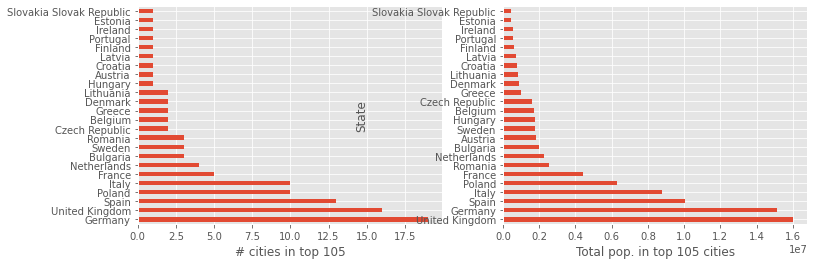

In [66]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")

df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total pop. in top 105 cities")

In [67]:
pd.date_range("2015-1-1", periods=31)

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12',
               '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16',
               '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20',
               '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24',
               '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28',
               '2015-01-29', '2015-01-30', '2015-01-31'],
              dtype='datetime64[ns]', freq='D')

In [68]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               '2015-01-01 10:00:00', '2015-01-01 11:00:00',
               '2015-01-01 12:00:00'],
              dtype='datetime64[ns]', freq='H')

In [69]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))
ts1.head()

2015-01-01    0
2015-01-02    1
2015-01-03    2
2015-01-04    3
2015-01-05    4
Freq: D, dtype: int64

In [70]:
ts1["2015-1-3"]

2

In [71]:
ts1.index[2]

Timestamp('2015-01-03 00:00:00', freq='D')

In [72]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

(2015, 1, 3)

In [73]:
ts1.index[2].nanosecond

0

In [74]:
ts1.index[2].to_pydatetime()

datetime.datetime(2015, 1, 3, 0, 0)

In [75]:
import datetime

In [76]:
ts2 = pd.Series(np.random.rand(2), index=[datetime.datetime(2015,1,1), datetime.datetime(2015,2,1)])
ts2

2015-01-01    0.115915
2015-02-01    0.822154
dtype: float64

In [77]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])
ts3 = pd.Series(np.random.rand(3), index=periods)
ts3

2015-01    0.784307
2015-02    0.846567
2015-03    0.449402
Freq: M, dtype: float64

In [78]:
ts3.index

PeriodIndex(['2015-01', '2015-02', '2015-03'], dtype='period[M]')

In [79]:
ts2.to_period('M')

2015-01    0.115915
2015-02    0.822154
Freq: M, dtype: float64

In [97]:
!head -n 5 temperature_outdoor_2014.tsv

1388530986	4.380000
1388531586	4.250000
1388532187	4.190000
1388532787	4.060000
1388533388	4.060000


In [98]:
df1 = pd.read_csv("temperature_outdoor_2014.tsv", delimiter="\t", names = ["time", "outdoor"])
df2 = pd.read_csv("temperature_indoor_2014.tsv", delimiter="\t", names = ["time", "indoor"])

In [99]:
df1.head()

,time,outdoor
0,1388530986,4.38
1,1388531586,4.25
2,1388532187,4.19
3,1388532787,4.06
4,1388533388,4.06


In [100]:
df2.head()

,time,indoor
0,1388530986,21.94
1,1388531586,22.00
2,1388532187,22.00
3,1388532787,22.00
4,1388533388,22.00


In [101]:
df1.time = (pd.to_datetime(df1.time.values, unit='s').tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time")

In [103]:
df2.time = (pd.to_datetime(df2.time.values, unit='s').tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time")

In [104]:
df1.head()

,outdoor
time,
2014-01-01 00:03:06+01:00,4.38
2014-01-01 00:13:06+01:00,4.25
2014-01-01 00:23:07+01:00,4.19
2014-01-01 00:33:07+01:00,4.06
2014-01-01 00:43:08+01:00,4.06


<AxesSubplot:xlabel='time'>

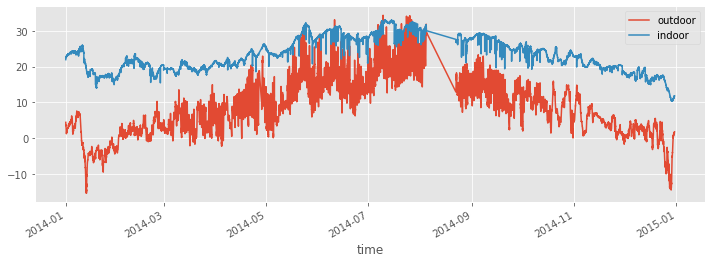

In [106]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
df1.plot(ax=ax)
df2.plot(ax=ax)


In [107]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49548 entries, 2014-01-01 00:03:06+01:00 to 2014-12-30 23:56:35+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  49548 non-null  float64
dtypes: float64(1)
memory usage: 774.2 KB


In [108]:
mask_jan = (df1.index >= "2014-1-1")&(df1.index < "2014-2-1")
df1_jan = df1[mask_jan]
df1_jan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4452 entries, 2014-01-01 00:03:06+01:00 to 2014-01-31 23:56:58+01:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   outdoor  4452 non-null   float64
dtypes: float64(1)
memory usage: 69.6 KB


In [109]:
df2_jan = df2["2014-1-1":"2014-1-31"]

<AxesSubplot:xlabel='time'>

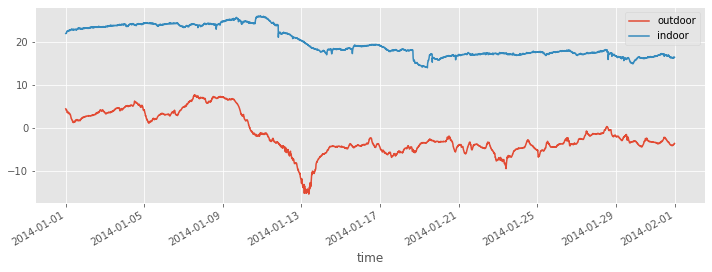

In [110]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

In [112]:
df1_month = df1.reset_index()
df1_month["month"] = df1_month.time.apply(lambda x: x.month)
df1_month.head()

,time,outdoor,month
0,2014-01-01 00:03:06+01:00,4.38,1
1,2014-01-01 00:13:06+01:00,4.25,1
2,2014-01-01 00:23:07+01:00,4.19,1
3,2014-01-01 00:33:07+01:00,4.06,1
4,2014-01-01 00:43:08+01:00,4.06,1


In [113]:
df1_month = df1_month.groupby("month").aggregate(np.mean)
df2_month = df2.reset_index()
df2_month["month"] = df2_month.time.apply(lambda x: x.month)
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [114]:
df_month = df1_month.join(df2_month)
df_month.head(3)

,outdoor,indoor
month,,
1,-1.776646,19.862590
2,2.231613,20.231507
3,4.615437,19.597748


In [115]:
df_month = pd.concat([df.to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)
df_month.head(3)

/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


,outdoor,indoor
time,,
2014-01,-1.776646,19.862590
2014-02,2.231613,20.231507
2014-03,4.615437,19.597748


<AxesSubplot:>

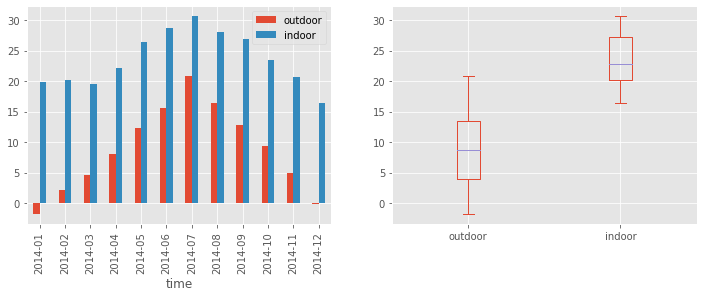

In [116]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

In [117]:
df1_hour = df1.resample("H").mean()
df1_hour.columns = ["outdoor (hourly avg.)"]
df1_day = df1.resample("D").mean()
df1_day.columns = ["outdoor (daily avg.)"]
df1_week = df1.resample("7D").mean()
df1_week.columns = ["outdoor (weekly avg.)"]
df1_month = df1.resample("7D").mean()
df1_month.columns = ["outdoor (monthly avg.)"]

df_diff = (df1.resample("D").mean().outdoor- df2.resample("D").mean().indoor)

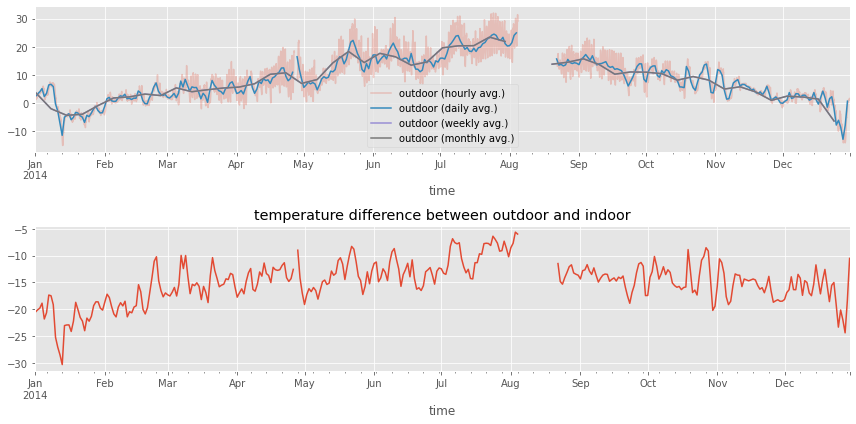

In [120]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)
df_diff.plot(ax=ax2)

ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()

In [122]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
                                             df1.resample("5min").ffill().rename(columns={"outdoor":"ffill"}),
                                             df1.resample("5min").bfill().rename(columns={"outdoor":"bfill"})],axis=1).head()

,None,ffill,bfill
time,,,
2014-01-01 00:00:00+01:00,4.38,NaN,4.38
2014-01-01 00:05:00+01:00,NaN,4.38,4.25
2014-01-01 00:10:00+01:00,4.25,4.38,4.25
2014-01-01 00:15:00+01:00,NaN,4.25,4.19
2014-01-01 00:20:00+01:00,4.19,4.25,4.19


In [123]:
sns.set(style="darkgrid")

In [127]:
df1 = pd.read_csv("temperature_outdoor_2014.tsv", delimiter="\t", names = ["time", "outdoor"])
df2 = pd.read_csv("temperature_indoor_2014.tsv", delimiter="\t", names = ["time", "indoor"])

In [128]:
df1.time = (pd.to_datetime(df1.time.values, unit='s').tz_localize('UTC').tz_convert('Europe/Stockholm'))
df1 = df1.set_index("time").resample("10min").mean()

In [129]:
df2.time = (pd.to_datetime(df2.time.values, unit='s').tz_localize('UTC').tz_convert('Europe/Stockholm'))
df2 = df2.set_index("time").resample("10min").mean()

In [130]:
df_temp = pd.concat([df1,df2], axis=1)

<AxesSubplot:xlabel='time'>

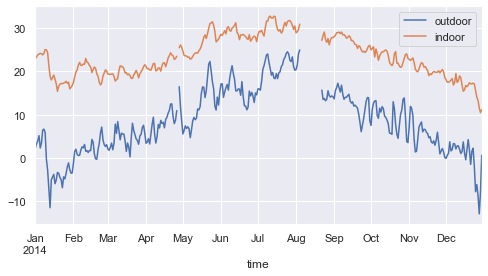

In [132]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax = ax)

/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

<AxesSubplot:ylabel='Density'>

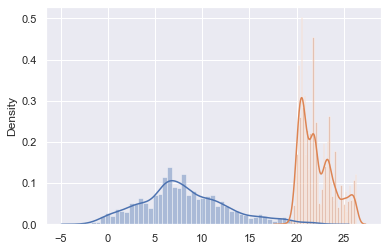

In [135]:
sns.distplot(df_temp.to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50)
sns.distplot(df_temp.to_period("M")["indoor"]["2014-04"].dropna().values, bins=50)

/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/bernardocohen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


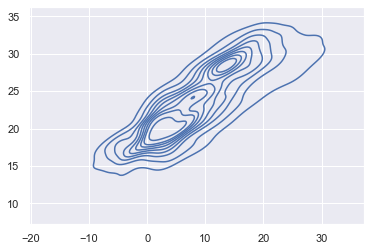

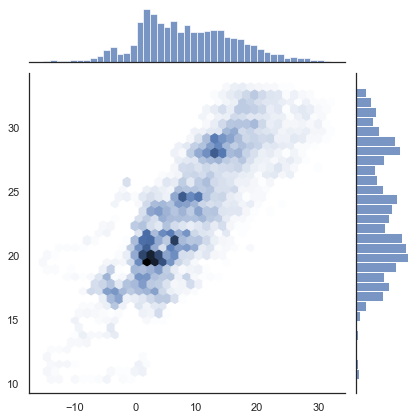

In [137]:
sns.kdeplot(df_temp.resample("H").mean()["outdoor"].dropna().values, df_temp.resample("H").mean()["indoor"].dropna().values, shade=False)
with sns.axes_style("white"):
    sns.jointplot(df_temp.resample("H").mean()['outdoor'].values, df_temp.resample("H").mean()["indoor"].values, kind='hex')

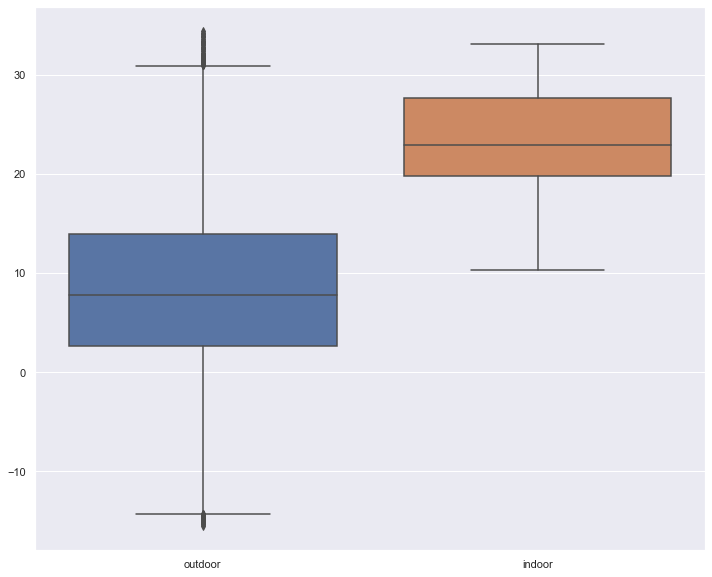

In [154]:
fig, ax = plt.subplots(1, figsize=(12,10))
ax = sns.boxplot(data = df_temp.dropna())
# ax2 = sns.violinplot(data = df_temp.dropna())

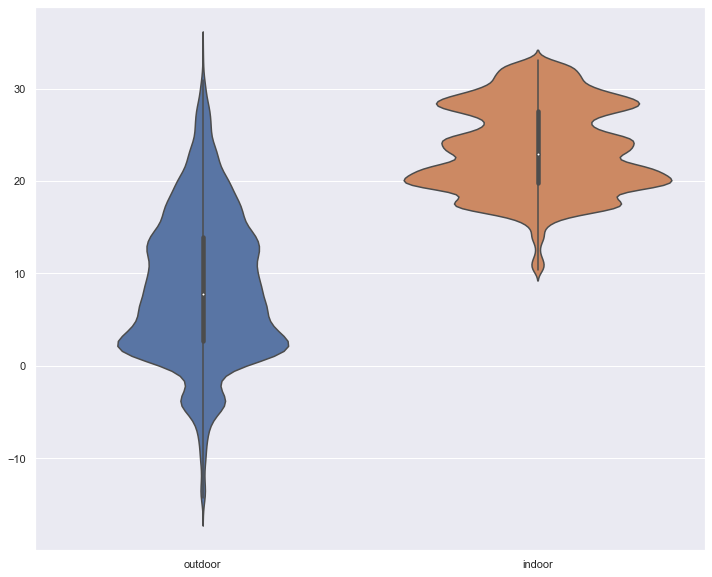

In [155]:
fig, ax = plt.subplots(1, figsize=(12,10))
ax = sns.violinplot(data = df_temp.dropna())

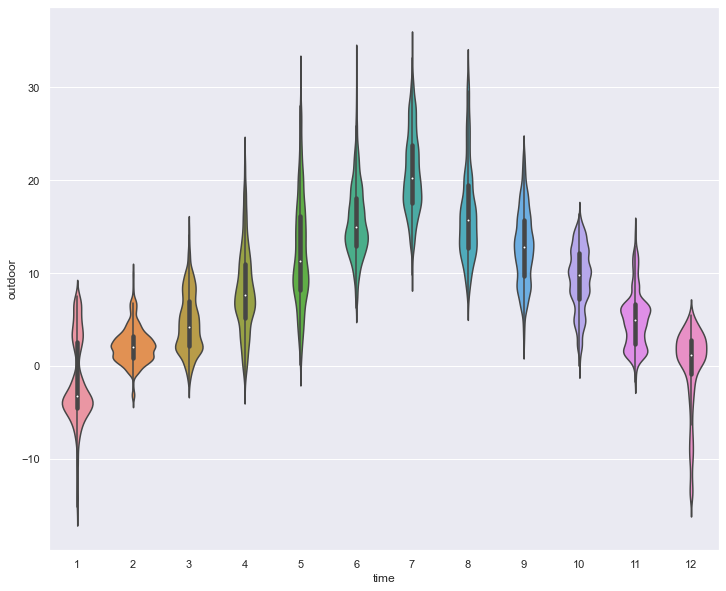

In [156]:
fig, ax = plt.subplots(1, figsize=(12,10))
ax = sns.violinplot(x = df_temp.dropna().index.month,
                   y = df_temp.dropna().outdoor)

In [157]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [159]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

<AxesSubplot:xlabel='hour', ylabel='month'>

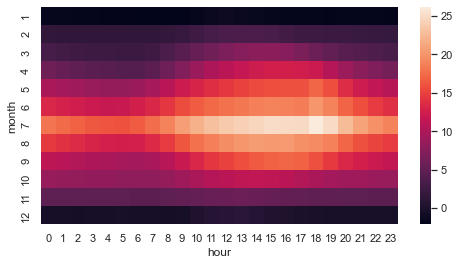

In [160]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(table, ax=ax)